In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
#обработка датафрейма
dau_channel = pd.read_excel('hw_lesson03_dau_channel.xlsx')
dau_channel['date'] = pd.to_datetime(dau_channel['date'])
dau_channel = dau_channel.set_index('date')

In [73]:
#медианы для каждого столбца
for i in dau_channel.columns.tolist():
    print(i, dau_channel[i].median())

BrainPlus 866.0
GameAds 385.0
JetAds 434.0
SenseAds 188.0


In [74]:
#создание нового столбца
new_column = 0
for i in dau_channel.columns.tolist():
    new_column += dau_channel[i]
dau_channel = dau_channel.assign(Total = new_column)
dau_channel

,BrainPlus,GameAds,JetAds,SenseAds,Total
date,,,,,
2020-04-01,627,292,159,56,1134
2020-04-02,761,322,235,109,1427
2020-04-03,887,427,306,121,1741
2020-04-04,966,466,341,148,1921
2020-04-05,951,479,346,166,1942
...,...,...,...,...,...
2020-06-26,943,485,519,211,2158
2020-06-27,1065,496,488,223,2272
2020-06-28,1130,498,542,227,2397


In [75]:
#процент от Total
dau_channel_new = dau_channel.copy()
for i in dau_channel.columns.tolist():
    if (i == 'Total'):
        break
    dau_channel_new[i] = round(dau_channel[i]/dau_channel['Total']*100).astype(int)
dau_channel_new

,BrainPlus,GameAds,JetAds,SenseAds,Total
date,,,,,
2020-04-01,55,26,14,5,1134
2020-04-02,53,23,16,8,1427
2020-04-03,51,25,18,7,1741
2020-04-04,50,24,18,8,1921
2020-04-05,49,25,18,9,1942
...,...,...,...,...,...
2020-06-26,44,22,24,10,2158
2020-06-27,47,22,21,10,2272
2020-06-28,47,21,23,9,2397


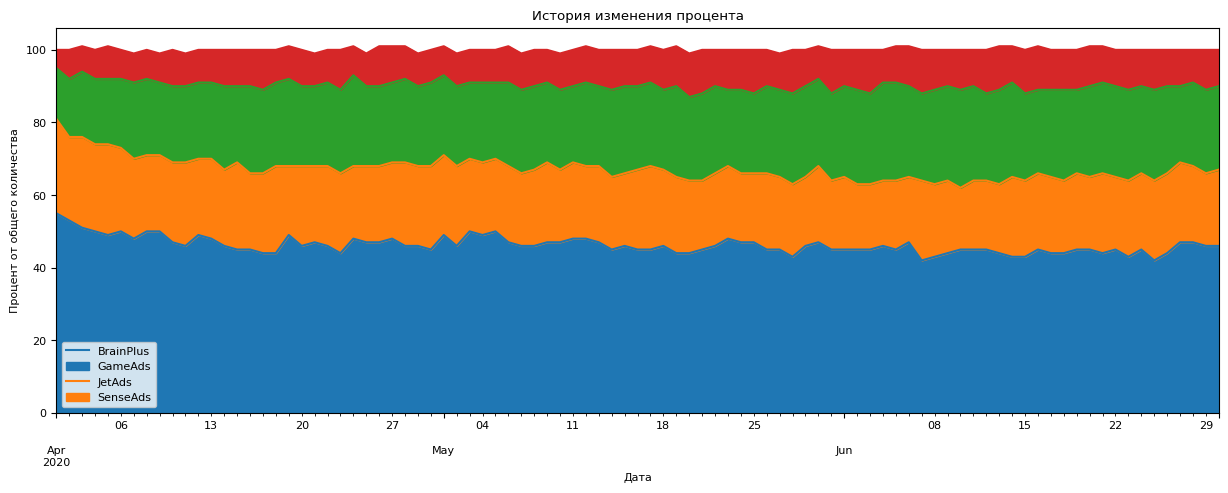

In [76]:
del dau_channel_new['Total']
plt.rcParams.update({'font.size': 8})
dau_channel_new[[j for j in dau_channel_new.columns.tolist()]].plot.area(figsize=(15, 5))
plt.legend(dau_channel_new.columns.tolist())
plt.xlabel('Дата')
plt.ylabel('Процент от общего количества')
plt.title('История изменения процента')
plt.show()